Importing the Libraries

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns

Importing the Dataset

In [ ]:
data = pd.read_csv('/content/Nifty 50 Historical Data (2).csv')

First 5 Rows

In [ ]:
data.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,19-12-2024,"23,963.70","23,886.60","24,004.70","23,883.85",145.65M,-1.03%
1,18-12-2024,"24,213.40","24,299.15","24,393.85","24,150.85",235.35M,-0.50%
2,17-12-2024,"24,336.00","24,584.80","24,624.10","24,303.45",264.88M,-1.35%
3,16-12-2024,"24,668.25","24,753.40","24,781.25","24,601.75",187.55M,-0.40%
4,13-12-2024,"24,768.30","24,498.35","24,792.30","24,180.80",310.08M,0.89%


Last 5 Rows

In [ ]:
data.tail()

,Date,Price,Open,High,Low,Vol.,Change %
7205,26-12-1995,905.33,899.87,906.47,898.41,NaN,0.52%
7206,22-12-1995,900.65,900.86,906.63,899.38,NaN,0.02%
7207,21-12-1995,900.5,888.25,900.5,887.73,NaN,1.69%
7208,20-12-1995,885.53,883.68,887.19,883.68,NaN,0.20%
7209,19-12-1995,883.72,882.35,884.19,879.54,NaN,0.12%


Rows and Columns

In [ ]:
data.shape

(7210, 7)

Info of Dataframe

In [75]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7210 entries, 0 to 7209
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       7210 non-null   datetime64[ns]
 1   Price      7210 non-null   float64       
 2   Open       7210 non-null   float64       
 3   High       7210 non-null   float64       
 4   Low        7210 non-null   float64       
 5   Vol.       7210 non-null   float64       
 6   Change %   7210 non-null   float64       
 7   YearMonth  7210 non-null   period[M]     
 8   Year       7210 non-null   int32         
 9   Range      7210 non-null   float64       
dtypes: datetime64[ns](1), float64(7), int32(1), period[M](1)
memory usage: 535.2 KB


Describe function for data

In [76]:
data.describe()

,Date,Price,Open,High,Low,Vol.,Change %,Year,Range
count,7210,7210.000000,7210.000000,7210.000000,7210.000000,7.210000e+03,7210.000000,7210.000000,7.210000e+03
mean,2010-06-07 14:14:12.815533824,6640.609968,6644.141667,6683.313820,6595.982576,1.817469e+08,0.056584,2009.933287,1.817403e+08
min,1995-12-19 00:00:00,788.150000,786.370000,805.820000,775.430000,1.400000e+06,-12.980000,1995.000000,1.398929e+06
25%,2003-03-10 06:00:00,1421.912500,1422.612500,1439.612500,1409.175000,6.949250e+07,-0.617500,2003.000000,6.948893e+07
50%,2010-06-02 12:00:00,5148.825000,5156.800000,5202.275000,5101.225000,1.443300e+08,0.080000,2010.000000,1.443290e+08
75%,2017-09-11 18:00:00,9662.312500,9656.937500,9688.325000,9630.462500,2.338025e+08,0.767500,2017.000000,2.337888e+08
max,2024-12-19 00:00:00,26216.050000,26248.250000,26277.350000,26151.400000,9.976500e+08,17.740000,2024.000000,9.976381e+08
std,NaN,5963.394090,5967.540547,5988.919793,5936.013953,1.542358e+08,1.439753,8.371348,1.542321e+08


Data Cleaning

Check for null values

In [ ]:
data.isnull().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,264
Change %,0


Convert 'Date' to datetime

In [8]:
data['Date'] = pd.to_datetime(data['Date'], format='%d-%m-%Y')

Remove commas and convert price-related columns to float

In [9]:
for col in ['Price', 'Open', 'High', 'Low']:
    data[col] = data[col].str.replace(',', '').astype(float)

Clean 'Vol.' column

In [10]:
def parse_volume(vol):
    if isinstance(vol, str):
        if 'M' in vol:
            return float(vol.replace('M', '')) * 1_000_000
        elif 'K' in vol:
            return float(vol.replace('K', '')) * 1_000
    return vol
data['Vol.'] = data['Vol.'].apply(parse_volume)

Clean 'Change %' column (Remove % symbol)

In [11]:
data['Change %'] = data['Change %'].str.replace('%', '').astype(float)

Handling null value in 'Vol.'

In [15]:
data['Vol.'] = pd.to_numeric(data['Vol.'], errors='coerce')
data['Vol.'] = data['Vol.'].fillna(data['Vol.'].median())

In [16]:
data.isnull().sum().sum()

0

Check for Duplicate Values

In [17]:
data.duplicated().sum()

0

EDA

Visualising the NIFTY 50 data

In [73]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=data['Date'],
         y=data['High'],
         name='High Price',
    line=dict(color='blue'),
    opacity=0.8))

fig.add_trace(go.Scatter(
         x=data['Date'],
         y=data['Low'],
         name='Low Price',
    line=dict(color='orange'),
    opacity=0.8))


fig.update_layout(title_text='NIFTY 50 High vs Close Trend',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')

fig.show()

NIFTY 50 Closing Price

In [62]:
fig = go.Figure()
fig.add_trace(go.Scatter(
         x=data['Date'],
         y=data['Price'],
         name='Closing Price',
    line=dict(color='blue'),
    opacity=0.8))
fig.update_layout(title_text='NIFTY 50 Closing Price',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')
fig.show()

Market performance since 2019

In [61]:
nifty_50_2019 = data[data['Date'] >= '2019-01-01']
nifty_50_2019.head()
df=nifty_50_2019
# Find the peak value (maximum closing price)
peak_value = nifty_50_2019['Price'].max()

# Get the date corresponding to the peak value
peak_date = nifty_50_2019.loc[nifty_50_2019['Price'].idxmax(), 'Date']

# Extract the year and month from the peak date
peak_year_month = peak_date.strftime('%Y-%m')  # Format as 'YYYY-MM'

print(f"The peak value is {peak_value} and it occurred in {peak_year_month}.")
fig = go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Price'])])
fig.update_layout(title_text='Market Performance from 2019',plot_bgcolor='rgb(250, 242, 242)',yaxis_title='Value')
fig.add_annotation(
    x=peak_date,
    y=peak_value,
    text=f"Peak: {peak_value} in {peak_year_month}",
    showarrow=True,
    arrowhead=2,
    ax=0,
    ay=-40,
    font=dict(color="red", size=12),
)
fig.show()

The peak value is 26216.05 and it occurred in 2024-09.


NIFTY_50 : Major single day falls -2019 onwards

In [65]:
# Calculate percentage change between consecutive days
nifty_50_2019.loc[:, 'Pct_Change'] = nifty_50_2019['Price'].pct_change() * 100

# Find the row with the largest negative percentage change (largest fall)
highest_fall = nifty_50_2019.loc[nifty_50_2019['Pct_Change'].idxmin()]

# Print the date, fall value, and percentage change for the highest fall
print(f"Highest Fall Value:")
print(f"Date: {highest_fall['Date'].strftime('%Y-%m-%d')}")
print(f"Fall Value: {highest_fall['Price']}")
print(f"Percentage Change: {highest_fall['Pct_Change']:.2f}%")


fig = px.line(nifty_50_2019, x='Date', y='Price', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',
    title='NIFTY_50 : Major single day falls -2019 onwards',
    yaxis_title='NIFTY 50 Stock',
    shapes = [dict(x0='2020-03-23', x1='2020-03-23', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,line_color='red',editable=False),
             dict(x0='2019-09-3', x1='2019-09-3', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red'),
             dict(x0='2020-02-1', x1='2020-02-1', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red'),
             dict(x0='2020-03-12', x1='2020-03-12', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='red')],
    annotations=[dict(x='2020-03-23', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Lockdown Phase-1 announced'),
                dict(x='2019-09-3', y=0.05, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='Multiple PSU Bank Merger Announcements'),
                dict(x='2020-02-1', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Union Budget,coronavirus pandemic'),
                dict(x='2020-03-12', y=0.3, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Coronavirus declared Pandemic by WHO')]
)

fig.show(renderer="colab")

Highest Fall Value:
Date: 2020-04-03
Fall Value: 8083.8
Percentage Change: -8.06%


 NIFTY_50 : Major single day gains -2019 onwards

In [68]:
# Calculate the daily price change (difference between consecutive prices)
nifty_50_2019.loc[:, 'Price_Change'] = nifty_50_2019['Price'].diff()

# Find the row with the largest positive price change (highest gain)
highest_gain = nifty_50_2019.loc[nifty_50_2019['Price_Change'].idxmax()]

# Print the date, gain value, and price change for the highest gain
print(f"Highest Single Day Gain:")
print(f"Date: {highest_gain['Date'].strftime('%Y-%m-%d')}")
print(f"Gain Value: {highest_gain['Price_Change']}")
print(f"New Price: {highest_gain['Price']}")

# Define a dictionary of events for corresponding dates
events = {
    '2019-05-20': 'Exit-Polls predict majority for BJP government',
    '2019-09-03': '2019 General Elections results announced',
    '2019-09-20': 'Cut in the corporate tax rate announced',
    '2020-04-07': 'Italy Coronavirus Nos went down'
}

# Find the corresponding issue/event for the highest gain date
gain_date_str = highest_gain['Date'].strftime('%Y-%m-%d')
if gain_date_str in events:
    print(f"Issue associated with highest gain: {events[gain_date_str]}")
else:
    print("No specific event associated with the highest gain.")


fig = px.line(nifty_50_2019, x='Date', y='Price', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=False,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

fig.update_layout(plot_bgcolor='rgb(250, 242, 242)',
    title='NIFTY_50 : Major single day gains -2019 onwards',
    yaxis_title='NIFTY 50 Stock',
    shapes = [dict(x0='2019-05-20', x1='2019-05-20', y0=0, y1=1, xref='x', yref='paper', line_width=2,opacity=0.3,line_color='green',editable=False),
             dict(x0='2020-05-23', x1='2020-05-23', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2019-09-20', x1='2019-09-20', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green'),
             dict(x0='2020-04-07', x1='2020-04-07', y0=0, y1=1, xref='x', yref='paper',line_width=3,opacity=0.3,line_color='green')],
    annotations=[dict(x='2019-05-20', y=0.54, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Exit-Polls predict majority'),
                 dict(x='2019-05-20', y=0.5, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='for BJP government'),
                dict(x='2019-09-3', y=0.08, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='2019 General Elections'),
                 dict(x='2019-09-3', y=0.05, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='results announced'),
                dict(x='2019-09-20', y=0.54, xref='x', yref='paper',
                    showarrow=False, xanchor='left', text='cut in the corporate tax rate announced'),
                dict(x='2020-04-07', y=0.3, xref='x', yref='paper',
                    showarrow=False, xanchor='right', text='Italy Coronavirus Nos went down')]
)

fig.show(renderer="colab")

Highest Single Day Gain:
Date: 2024-06-03
Gain Value: 1379.4000000000015
New Price: 23263.9
No specific event associated with the highest gain.


Box Plot of Price Ranges

The highest value category is 'High' with a maximum value of ₹26277.35



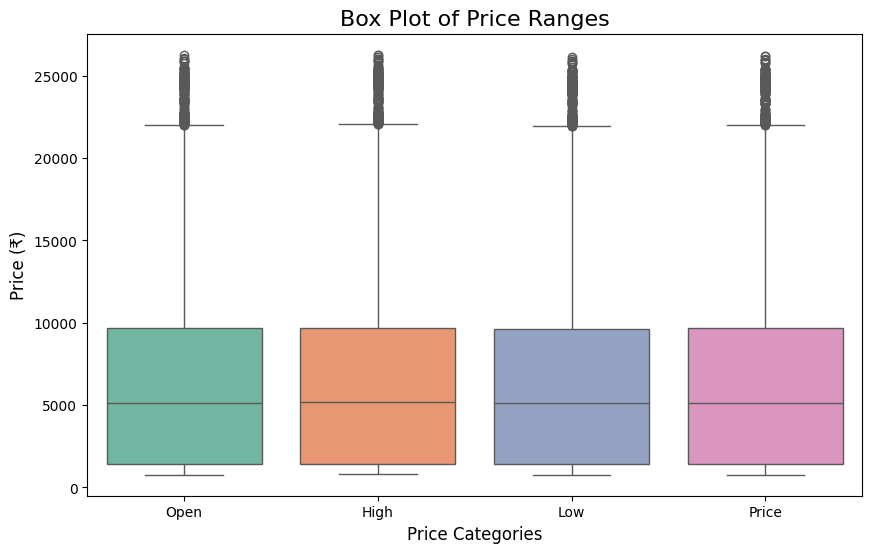

In [74]:
price_data = data[['Open', 'High', 'Low', 'Price']]
# Calculate the maximum value for each category ('Open', 'High', 'Low', 'Price')
max_values = price_data.max()

# Identify the category with the highest maximum value
highest_value_category = max_values.idxmax()
highest_value = max_values.max()

# Print the result
print(f"The highest value category is '{highest_value_category}' with a maximum value of ₹{highest_value:.2f}\n")
plt.figure(figsize=(10, 6))
sns.boxplot(data=price_data, palette='Set2')
plt.title('Box Plot of Price Ranges', fontsize=16)
plt.ylabel('Price (₹)', fontsize=12)
plt.xlabel('Price Categories', fontsize=12)
plt.show()


Scatter Plot of Volume vs. Closing Price

The value with the highest range is:
Volume: 997650000.0 (in millions)
Closing Price: ₹11910.15
Range (Difference): 997638089.85


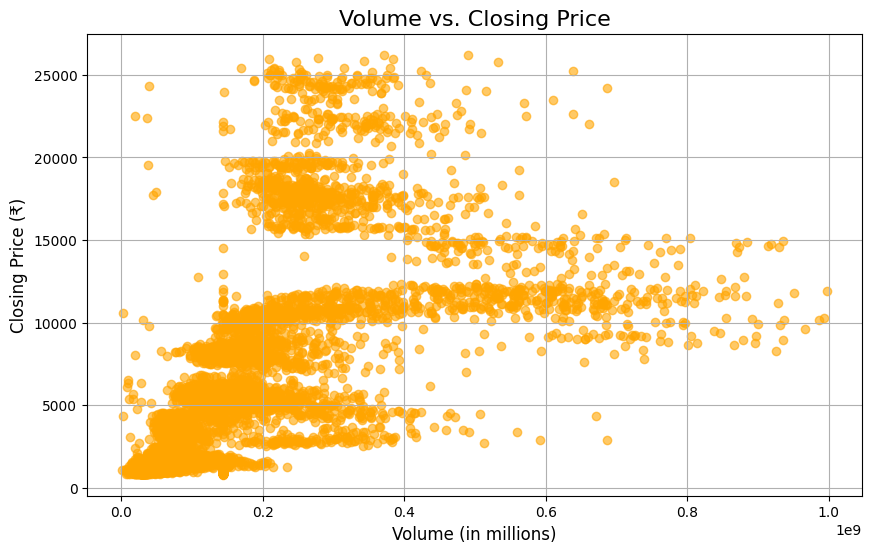

In [71]:
# Calculate the range for each data point (price - volume)
# If you're comparing the absolute difference between 'Vol.' and 'Price', this would be the range
data['Range'] = abs(data['Vol.'] - data['Price'])

# Find the row with the highest range
highest_range_row = data.loc[data['Range'].idxmax()]

# Print the result
print(f"The value with the highest range is:")
print(f"Volume: {highest_range_row['Vol.']} (in millions)")
print(f"Closing Price: ₹{highest_range_row['Price']}")
print(f"Range (Difference): {highest_range_row['Range']}")

plt.figure(figsize=(10, 6))
plt.scatter(data['Vol.'], data['Price'], alpha=0.6, color='orange')
plt.title('Volume vs. Closing Price', fontsize=16)
plt.xlabel('Volume (in millions)', fontsize=12)
plt.ylabel('Closing Price (₹)', fontsize=12)
plt.grid(True)
plt.show()


Heatmap of Correlations Between Numeric Features

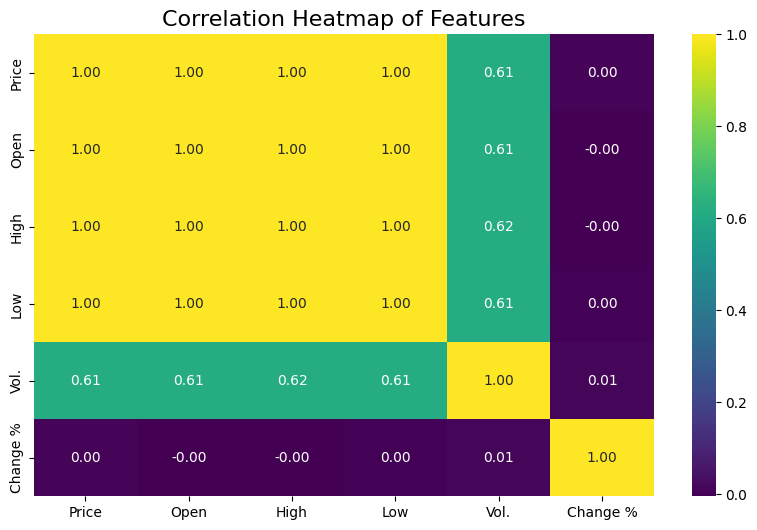

In [40]:
plt.figure(figsize=(10, 6))
correlation_matrix = data[['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap of Features', fontsize=16)
plt.show()


Trend of Volume Over Time

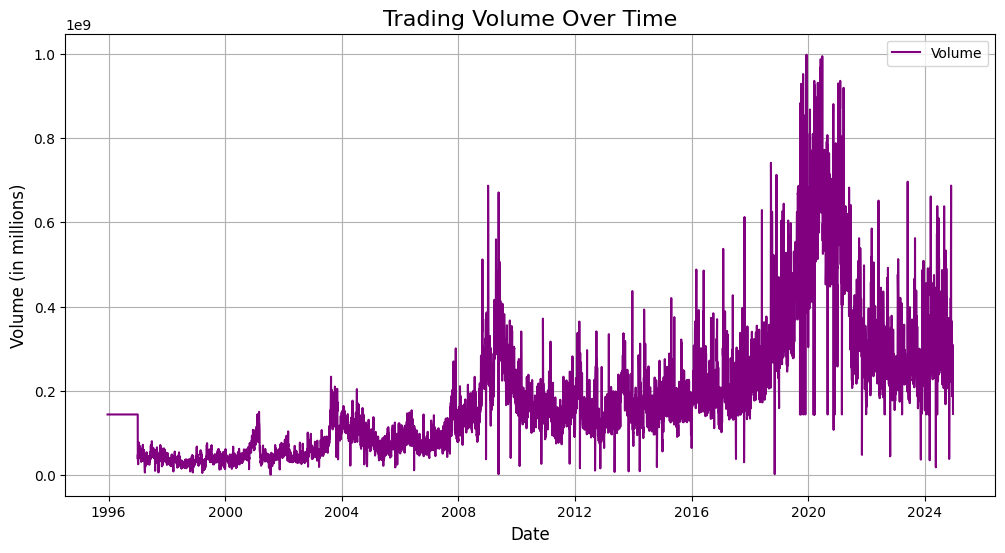

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(data['Date'], data['Vol.'], label='Volume',  color='purple')
plt.title('Trading Volume Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Volume (in millions)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


 Monthly Average Closing Price Trend

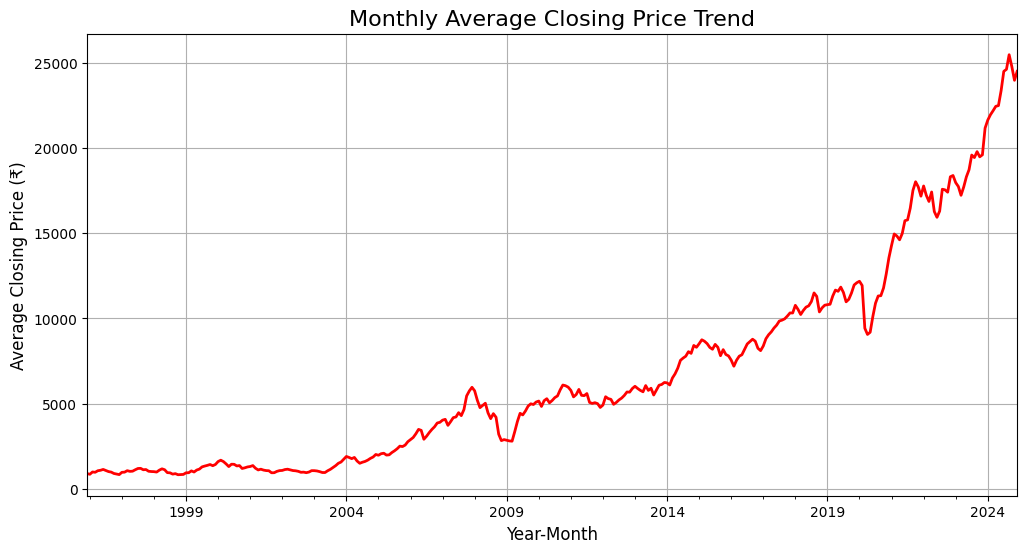

In [53]:
# Extract year and month from the Date column
data['YearMonth'] = data['Date'].dt.to_period('M')

# Calculate monthly average closing price
monthly_avg = data.groupby('YearMonth')['Price'].mean()

# Plot the monthly average trend
plt.figure(figsize=(12, 6))
monthly_avg.plot(kind='line', color='red', linewidth=2)
plt.title('Monthly Average Closing Price Trend', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Closing Price (₹)', fontsize=12)
plt.grid(True)
plt.show()


Yearly Average Percentage Change

Year with highest percentage rise: 1995 with a rise of 0.37%
Year with lowest percentage change (maximum loss): 2008 with a fall of -0.26%


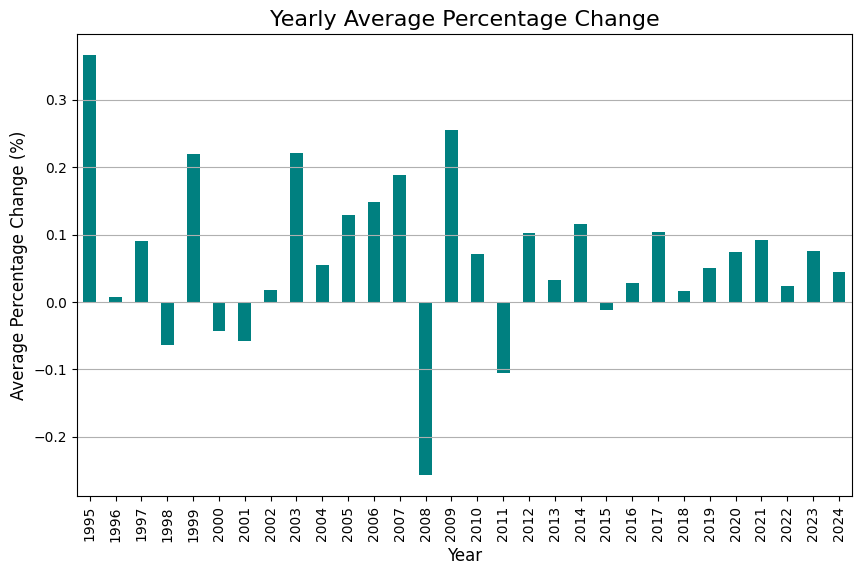

In [72]:
# Extract year from the Date column
data['Year'] = data['Date'].dt.year

# Calculate yearly average percentage change
yearly_avg_change = data.groupby('Year')['Change %'].mean()

# Find the year with the highest percentage rise (max value)
highest_rise_year = yearly_avg_change.idxmax()
highest_rise_value = yearly_avg_change.max()

# Find the year with the lowest percentage (max negative value)
lowest_rise_year = yearly_avg_change.idxmin()
lowest_rise_value = yearly_avg_change.min()

# Print the results
print(f"Year with highest percentage rise: {highest_rise_year} with a rise of {highest_rise_value:.2f}%")
print(f"Year with lowest percentage change (maximum loss): {lowest_rise_year} with a fall of {lowest_rise_value:.2f}%")

# Plot yearly average percentage change
plt.figure(figsize=(10, 6))
yearly_avg_change.plot(kind='bar', color='teal')
plt.title('Yearly Average Percentage Change', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Percentage Change (%)', fontsize=12)
plt.grid(axis='y')
plt.show()
